## Stemming com nome de comarca e estado

In [27]:
import re
import os
import os.path
import pandas as pd
from nltk.tokenize import RegexpTokenizer
import nltk

ini_path = 'D:/insper'
files = 'unificada_classificacao_tudo.csv'
df = pd.read_csv(os.path.join(ini_path,files))
# df = df[df.estado.isin(['AM', 'BA', 'CE', 'MS', 'MT', 'RJ', 'RS', 'SC', 'SP', 'AC','AL', 'PB', 'PE', 'RN', 'SE'])][df['Acórdão']=='Sim'].reset_index(drop=True)
# df = df[df.estado.isin(['TRF4','TRF5'])][df['Acórdão']=='Sim'].reset_index(drop=True)

def remove_accents(text):
    accents = {
        "Á": "A","Ã": "A","À": "A","á": "a","ã": "a","à": "a",
        "É": "E","é": "e","Ê": "E","ê": "e","Í": "I","í": "i",
        "Ó": "O","ó": "o","Õ": "O","õ": "o","Ô": "O","ô": "o",
        "Ú": "U","ú": "u",";": "",",": "","/": "","\\": "",
        "{": "","}": "","(": "",")": "","-": "","_": "","Ç":"C",
        "ç":"c",
    }
    text = str(text).lower()
    for k, v in accents.items():
        text = text.replace(k, v)
    return text

comarcas = list(df.comarcas.unique())
comarcas_clean = list()
for c in comarcas:
    comarcas_clean.append(remove_accents(c))

comarca_clean = comarcas_clean + ['acre',
    'alagoas',
    'amapa',
    'amazonas',
    'bahia',
    'ceara',
    'distrito federal',
    'espirito santo',
    'goias',
    'maranhao',
    'mato grosso',
    'mato grosso do sul',
    'minas gerais',
    'para',
    'paraiba',
    'pernambuco',
    'piaui',
    'rio de janeiro',
    'rio grande do norte',
    'rio grande do sul',
    'rondonia',
    'roraima',
    'santa catarina',
    'sao paulo',
    'sergipe',
    'tocantins']

def normalize_texts(texts, to_stem=False):
    if to_stem:
        stemmer = nltk.stem.RSLPStemmer()
    normal_texts = []
    tk = RegexpTokenizer(r"\w+")
    stopwords = set(nltk.corpus.stopwords.words("portuguese") + ['artigo','disse','codigo','processo','acusado','paulo','crime','autos',
        'valor','justica','sendo','anos','tambem','acao','juizo','sobre','tribunal','estado','termos','porque','forma','denuncia','fatos','procedimento',
        'ainda','sentenca','pois','comarca','havia','defesa','assim','jose','conforme','vara','publica','qualquer','documento','apos','caso','carlos','fato','apenas',
        'dois','razao','reus','pratica','minimo','servicos','regime','relacao','delito','foro','fase','afirmou','direito','depoente','conduta','sido','parte','meses',
        'quanto','silva','caput','epoca','todos','sabe','local','tendo','classe','dias','tres','outro','lauda','municipal','data','pessoa','horario','circunstâncias',
        'antonio','prisao','entao','nome','alem','nada','documentos','conta','nunca','atendimento','conhecimento','vantagem','outros','inicial','vitima','duas','casa',
        'informou','legal','testemunhas','durante','inciso','base','acusacao','provas','servico','reais','feito','digital','prestacao','eduardo','diante','fazer','julgado',
        'somente','contrato','pessoas','penas','onde','cargo','vezes','presente','trânsito','ocorrencia','relatou','quatro','tempo','cumprimento','pode','quantia','momento',
        'privativa','diasmulta','cada','instrucao','demais','santos','autoria','tipo','meio','pedido','ficou','funcao','assinado','execucao','modo','outras','nesse','aumento',
        'administracao','oliveira','nesta','fixo','ordinario','portanto','periodo','deve','ambos','sentido','inquerito','elementos','outra','juiza','flagrante','segundo','vista',
        'responsavel','criminosa','audiencia','acima','negou','correu','proprio','sistema','consta','ofereceu','fundamento','direitos','desde','tudo','contato','prejuizo','luiz',
        'multa','setor','recebeu','previsto','ausencia','materialidade','inclusive','bens','depoimento','secretaria','acusada','sempre','margem','mesma','agente','objeto','nenhum',
        'digitalmente','impressao','recorda','quais','agentes','ativa','antes','licitatorio','fazia','funcionarios','contra','assunto','apresentou','maria','declarou','incurso',
        'direita','contas','salario','indevida','julgo','ante','cinco','filho','material','denunciado','organizacao','drogas','marco','falou','pediu','respeito','primeira','dolo',
        'trafico','aberto','acordo','auto','final','trabalhava','situacao','serem','poder','declarante','celular','ribeiro','presidente','mediante','joao','conhece','dispensa',
        'possivel','porem','desta','todo','recursos','origem','segunda','aplicacao','judicial','depoimentos','alegacoes','algum','embora','escritorio','prazo','exposto','feita',
        'dizer','comissao','recurso','restou','central','tanto','passo','juiz','souza','disso','tais','trabalho','publicos','recebimento','civil','dentro','todas','realizacao',
        'boletim','considerando','sabia','confirmou','informacoes','marcelo','participacao','havendo','junto','decisao','soube','qualificado','chegou','departamento','devidamente',
        'militares','alguns','vinte','unico','poderia','finais','causa','ocasiao','apreensao','neste','posse','pretensao','como','requereu','causas','superior','pessoal','medida',
        'participou','delitiva','lavagem','veiculos','realizada','junior','federal','social','condicoes','partes','trabalhou','advogado','ademais','falar','seis','infracao','luis','motivo',] + comarcas_clean)
    for t in texts:
        raw_text = remove_accents(t)  # steps 1 and 2
        tokens = tk.tokenize(raw_text)  # step 3
        processed_text = ""
        for tkn in tokens:
            if tkn.isalpha() and tkn not in stopwords and len(tkn) > 3:  # step 4
                if to_stem:
                    tkn = stemmer.stem(tkn)  # step 5
                processed_text += tkn + " "
        normal_texts.append(processed_text[:-1])
    return normal_texts


C:\Users\henri\AppData\Local\Temp\ipykernel_12164\297601879.py:10: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(ini_path,files))


In [28]:

decisao_clean = list()
for _,row in df.iterrows():
    decisao_clean.append(normalize_texts([row.publicacao], to_stem=True))
df['decisao_clean'] = decisao_clean

decisao_clean = list()
for _,row in df.iterrows():
    decisao_clean.append(row.decisao_clean[0])
df['decisao_clean'] = decisao_clean
# df.to_csv(os.path.join(ini_path, f'sentencas_tj_processadas.csv'),index=False)
df.to_csv(os.path.join(ini_path, f'sentencas_todas_processadas_2.csv'),index=False)

## Clusterização

In [29]:
import re
import os
import pandas as pd

from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import decomposition, ensemble

import pandas as pd
import numpy as np
import xgboost, textblob, string
from keras.preprocessing import text, sequence
from keras import layers, models, optimizers

# ini_path = 'E:/insper'
# files = 'datajud.csv'
# df = pd.read_csv(os.path.join(ini_path,files))
# interesse = set(list(df[df.ano_cnj>=2020].reset_index(drop = True).numero))

ini_path = 'D:/insper'
files = 'sentencas_todas_processadas_2.csv'
df = pd.read_csv(os.path.join(ini_path,files))
df['ano'] = df.numero_processo.str[11:15].astype(float)
df = df[df['Acórdão']=='Sim']
df.head()


C:\Users\henri\AppData\Local\Temp\ipykernel_12164\3736887078.py:22: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(ini_path,files))


,numero_processo,publicacao,numeros_paginas,nomes_pastas,estado,tipos_processuais,comarcas,representantes,assuntos,tribunal,...,mes,ano,nome_documento,data_decisao,orgao_julgador,tipo_publicacao,concedido,negado,Acórdão,decisao_clean
18,0644136-52.2017.8.04.0001,ADV: MARCELO AUGUSTO JANSEN SODRÉ (OAB 11282/ ...,314,02-08-2018,AM,ação civil de improbidade administrativa,Manaus,['11282/ AM'],dano ao erário,NaN,...,NaN,2017.0,NaN,NaN,NaN,NaN,RECURSO CONHECIDO E IMPRÓVIDO .,NaN,Sim,august jansen sodr improb administr dan erari ...
30,0215732-22.2018.8.04.0001,"ADV: SHELBY MOREIRA FINICELLI (OAB 5684/AM), A...",209,03-08-2018,AM,restituição de coisas apreendidas,Manaus,"['5684/AM', '8457/ AM']",coisas,NaN,...,NaN,2018.0,NaN,NaN,NaN,NaN,"Ante o exposto, em dissonância com o parecer M...",NaN,Sim,shelby mor finicell claud batist carvalh queir...
38,0630524-47.2017.8.04.0001,01 Processo: 0630524-47.2017.8.04.0001 - Apela...,18,04-04-2018,AM,apelação,Manaus,['8245/AM'],NaN,NaN,...,NaN,2017.0,NaN,NaN,NaN,NaN,NaN,"DECISÃO: ""Vistos, relatados e discutidos estes...",Sim,apelaca apel tailson albuquerqu hermerson rodr...
46,0623661-75.2017.8.04.0001,"ADV: ARNOLDO BENTES COIMBRA (OAB 345/AM), ADV:...",104,04-10-2018,AM,embargos de declaração,Manaus,"['345/AM', '6733/AM']",licitações,NaN,...,NaN,2017.0,NaN,NaN,NaN,NaN,NaN,"ADV: ARNOLDO BENTES COIMBRA (OAB 345/AM), ADV:...",Sim,arnold bent coimbr daniel andrad mand seguranc...
53,0035708-44.2010.8.04.0012,"ADV: EDNILSON PIMENTEL MATOS (OAB 1799/AM), RO...",109,05-03-2018,AM,ação civil de improbidade administrativa,NaN,"['1799/AM', '4314/AM', '3665/AM', '4714/AM']",improbidade administrativa,NaN,...,NaN,2010.0,NaN,NaN,NaN,NaN,(STJ - EDcl no REsp: 1635464 MS 2015/0277170-4...,NaN,Sim,ednilson pimentel mat roberv mend josaf mor ka...


In [29]:
import pandas as pd
from scipy.sparse import csc_matrix

df = pd.DataFrame(data=csc_matrix.todense(xtrain_tfidf_ngram))
df.to_csv(os.path.join(ini_path,'tf_idf.csv'), index=False)


In [30]:
# tjs = ['TJBA', 'TJCE', 'TJMS', 'TJMT', 'TJRJ', 'TJRS', 'TJSC','TJSP']
# df_final = df[~df.tribunal.isin(tjs)]
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
# df['numero_limpo'] = df.numero_processo.str.replace('\.|\-', '')
# df_true = df[df.numero_limpo.isin(interesse)]
# df_true['result'] = 1
# df_false = df[~df.numero_limpo.isin(interesse)]
# df_false['result'] = 0

# df_final = pd.concat([df_true, df_false], ignore_index=True, sort=False)
# df_final.to_excel(os.path.join(ini_path,'todas_sentencas.xlsx'))
# train_x, valid_x, train_y, valid_y = model_selection.train_test_split(df_final['decisao_clean'], df_final['result'], random_state=42)
# df_final.tribunal.unique()

d:\Anaconda\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
d:\Anaconda\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
d:\Anaconda\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
d:\Anaconda\lib\site-packages\sklearn\utils\validation.py:593: FutureWarn

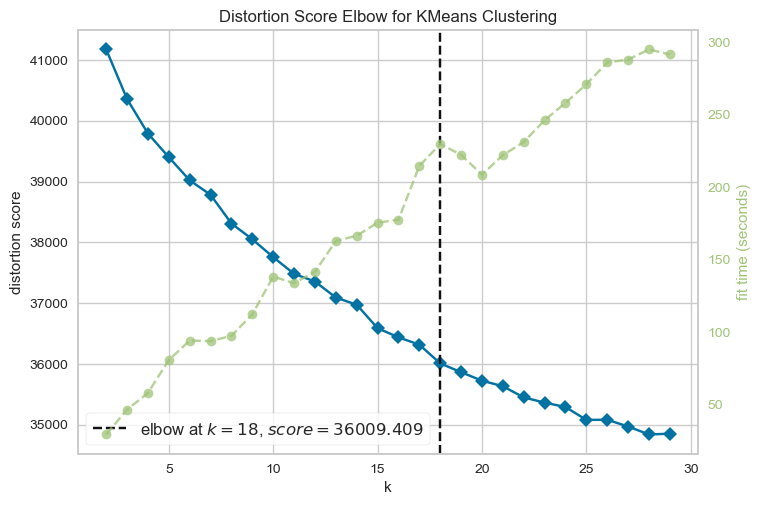

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [31]:
tfidf_vect_ngram = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', ngram_range=(1,3), max_features=10000)
tfidf_vect_ngram.fit(df['decisao_clean'])
import math
train_x = df.decisao_clean
xtrain_tfidf_ngram =  tfidf_vect_ngram.transform(train_x)
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,30), timings= True)
visualizer.fit(xtrain_tfidf_ngram)        # Fit data to visualizer
visualizer.show()     

In [32]:
from collections import defaultdict
from sklearn import metrics
from time import time
from sklearn.cluster import KMeans


evaluations = []
evaluations_std = []

def fit_and_evaluate(km, X, name=None, n_runs=5):
    name = km.__class__.__name__ if name is None else name

    train_times = []
    scores = defaultdict(list)
    for seed in range(n_runs):
        km.set_params(random_state=seed)
        t0 = time()
        km.fit(X)
        train_times.append(time() - t0)
        # scores["Homogeneity"].append(metrics.homogeneity_score(labels, km.labels_))
        # scores["Completeness"].append(metrics.completeness_score(labels, km.labels_))
        # scores["V-measure"].append(metrics.v_measure_score(labels, km.labels_))
        # scores["Adjusted Rand-Index"].append(
        #     metrics.adjusted_rand_score(labels, km.labels_)
        # )
        # scores["Silhouette Coefficient"].append(
        #     metrics.silhouette_score(X, km.labels_, sample_size=2000)
        # )
    train_times = np.asarray(train_times)

    print(f"clustering done in {train_times.mean():.2f} ± {train_times.std():.2f} s ")
    evaluation = {
        "estimator": name,
        "train_time": train_times.mean(),
    }
    evaluation_std = {
        "estimator": name,
        "train_time": train_times.std(),
    }
    for score_name, score_values in scores.items():
        mean_score, std_score = np.mean(score_values), np.std(score_values)
        print(f"{score_name}: {mean_score:.3f} ± {std_score:.3f}")
        evaluation[score_name] = mean_score
        evaluation_std[score_name] = std_score
    evaluations.append(evaluation)
    evaluations_std.append(evaluation_std)

kmeans = KMeans(
    n_clusters = 18,
    max_iter = 500,
    n_init=5,
)

fit_and_evaluate(kmeans, xtrain_tfidf_ngram, name="KMeans\non tf-idf vectors")
# centroids_antes  = kmeans.cluster_centers_
# centroids_LJ  = kmeans.cluster_centers_
centroids_VJ  = kmeans.cluster_centers_

clustering done in 99.59 ± 5.99 s 


In [33]:
df['cluster'] = kmeans.labels_

In [20]:
df.head()

,numero_processo,publicacao,numeros_paginas,nomes_pastas,estado,tipos_processuais,comarcas,representantes,assuntos,tribunal,...,mes,ano,nome_documento,data_decisao,orgao_julgador,tipo_publicacao,concedido,negado,Acórdão,decisao_clean
18,0644136-52.2017.8.04.0001,ADV: MARCELO AUGUSTO JANSEN SODRÉ (OAB 11282/ ...,314,02-08-2018,AM,ação civil de improbidade administrativa,Manaus,['11282/ AM'],dano ao erário,NaN,...,NaN,2017.0,NaN,NaN,NaN,NaN,RECURSO CONHECIDO E IMPRÓVIDO .,NaN,Sim,august jansen sodr improb administr dan erari ...
30,0215732-22.2018.8.04.0001,"ADV: SHELBY MOREIRA FINICELLI (OAB 5684/AM), A...",209,03-08-2018,AM,restituição de coisas apreendidas,Manaus,"['5684/AM', '8457/ AM']",coisas,NaN,...,NaN,2018.0,NaN,NaN,NaN,NaN,"Ante o exposto, em dissonância com o parecer M...",NaN,Sim,shelby mor finicell claud batist carvalh queir...
38,0630524-47.2017.8.04.0001,01 Processo: 0630524-47.2017.8.04.0001 - Apela...,18,04-04-2018,AM,apelação,Manaus,['8245/AM'],NaN,NaN,...,NaN,2017.0,NaN,NaN,NaN,NaN,NaN,"DECISÃO: ""Vistos, relatados e discutidos estes...",Sim,apelaca apel tailson albuquerqu hermerson rodr...
46,0623661-75.2017.8.04.0001,"ADV: ARNOLDO BENTES COIMBRA (OAB 345/AM), ADV:...",104,04-10-2018,AM,embargos de declaração,Manaus,"['345/AM', '6733/AM']",licitações,NaN,...,NaN,2017.0,NaN,NaN,NaN,NaN,NaN,"ADV: ARNOLDO BENTES COIMBRA (OAB 345/AM), ADV:...",Sim,arnold bent coimbr daniel andrad mand seguranc...
53,0035708-44.2010.8.04.0012,"ADV: EDNILSON PIMENTEL MATOS (OAB 1799/AM), RO...",109,05-03-2018,AM,ação civil de improbidade administrativa,NaN,"['1799/AM', '4314/AM', '3665/AM', '4714/AM']",improbidade administrativa,NaN,...,NaN,2010.0,NaN,NaN,NaN,NaN,(STJ - EDcl no REsp: 1635464 MS 2015/0277170-4...,NaN,Sim,ednilson pimentel mat roberv mend josaf mor ka...


In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
colors=['#fae588','#f79d65','#f9dc5c','#e8ac65','#e76f51','#ef233c','#b7094c'] #color palette


In [21]:
df[df["cluster"]==3].count()["cluster"]

5310

In [35]:
final_df = list()
for grupo in list(df.cluster.unique()):
    for tribunal in list(df.tribunal.unique()):
        rows = dict()
        rows['cluster'] = grupo
        rows['tribunal'] = tribunal
        rows['quantidade'] = df[(df["cluster"]==grupo) & (df["tribunal"] == tribunal)].count()["cluster"]
        final_df.append(rows)
final_df = pd.DataFrame(final_df)
final_df.to_excel(os.path.join(ini_path,'clusters.xlsx'))

In [25]:
final_df = pd.DataFrame(final_df)

In [27]:
final_df.to_excel(os.path.join(ini_path,'clusters.xlsx'))

## Numero de cluster ótimo

ZeroDivisionError: float division by zero

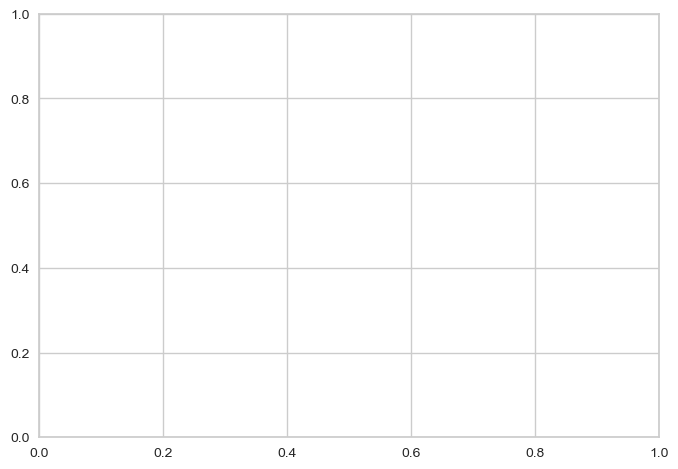

In [26]:

sns.set_style(style="whitegrid") # set seaborn plot style
sizes = final_df["quantidade"].values# proportions of the categories
label = final_df["tribunal"]
squarify.plot(sizes=sizes, label=label, alpha=0.6,color=colors).set(title='Treemap with Squarify')
plt.axis('off')
plt.show()

In [5]:
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer

lsa = make_pipeline(TruncatedSVD(n_components=100), Normalizer(copy=False))
t0 = time()
X_lsa = lsa.fit_transform(xtrain_tfidf_ngram)
explained_variance = lsa[0].explained_variance_ratio_.sum()

print(f"LSA done in {time() - t0:.3f} s")
print(f"Explained variance of the SVD step: {explained_variance * 100:.1f}%")

kmeans = KMeans(
    n_clusters=11,
    max_iter=100,
    n_init=1,
)

fit_and_evaluate(kmeans, X_lsa, name="KMeans\nwith LSA on tf-idf vectors")

original_space_centroids = lsa[0].inverse_transform(kmeans.cluster_centers_)
order_centroids = original_space_centroids.argsort()[:, ::-1]
terms = tfidf_vect_ngram.get_feature_names_out()

for i in range(11):
    print(f"Cluster {i}: ", end="")
    for ind in order_centroids[i, :10]:
        print(f"{terms[ind]} ", end="")
    print()

LSA done in 6.373 s
Explained variance of the SVD step: 34.4%
clustering done in 0.26 ± 0.03 s 
Cluster 0: penal crim defir publ ministeri ministeri publ recorr pen sant catarin 
Cluster 1: agrav agrav instrument instrument interess rela efeit publ improb indisponibil conhec 
Cluster 2: gui resoluca agrav port remess retorn remess retorn port remess remess retorn sit port 
Cluster 3: improb administr improb administr requer defir publ municipi vist ministeri ministeri publ 
Cluster 4: embarg embarg declaraca declaraca gui resoluca rejeit omissa contradica cust gui port remess retorn 
Cluster 5: embarg crim magistrado crim câm crim magistrado embargt embargd colend embarg declaraca embargd colend câm colend câm colend 
Cluster 6: apel and eletron apelaca crim crim apelaca crim apel ministeri apel ministeri publ apelaca exclusiv eletron apelaca eletron apelaca 
Cluster 7: crim corpu impetr habe habe corpu paci penal rela apel conhec 
Cluster 8: pag honorari administr improb conden improb

TRF4


d:\Anaconda\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
d:\Anaconda\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
d:\Anaconda\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
d:\Anaconda\lib\site-packages\sklearn\utils\validation.py:593: FutureWarn

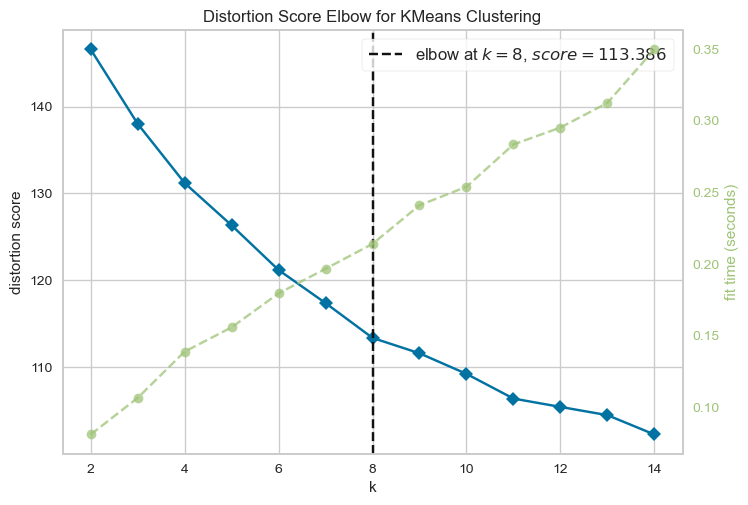

TRF5


d:\Anaconda\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
d:\Anaconda\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
d:\Anaconda\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
d:\Anaconda\lib\site-packages\sklearn\utils\validation.py:593: FutureWarn

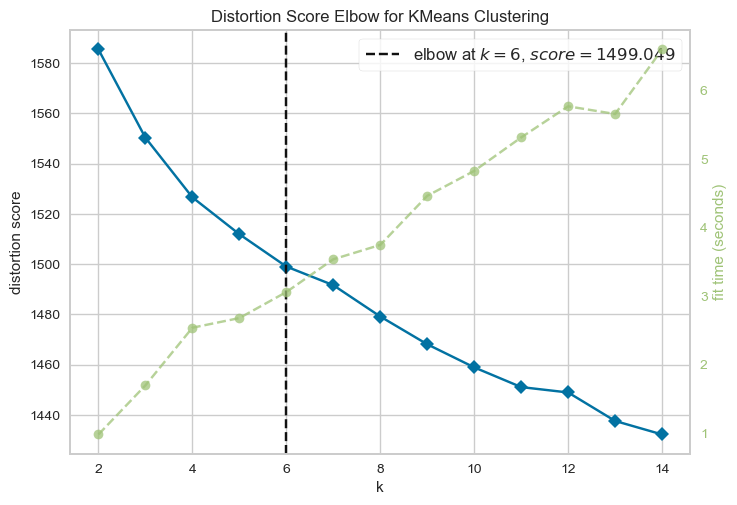

In [25]:
tfidf_vect_ngram = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', ngram_range=(1,3), max_features=10000)
tfidf_vect_ngram.fit(df_final['decisao_clean'])
import math
for tribunal in ['TRF4', 'TRF5']:
    df_tribunal = df_final[df_final.tribunal == tribunal]
    train_x = df_tribunal.decisao_clean
    xtrain_tfidf_ngram =  tfidf_vect_ngram.transform(train_x)
    model = cluster.KMeans()
    # k is range of number of clusters.
    print(tribunal)
    visualizer = KElbowVisualizer(model, k=(2,15), timings= True)
    visualizer.fit(xtrain_tfidf_ngram)        # Fit data to visualizer
    visualizer.show()        # Finalize and render figure



In [ ]:
# Elbow Method for K means# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = cluster.KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,30), timings= True)
visualizer.fit(xtrain_tfidf_ngram)        # Fit data to visualizer
visualizer.show()        # Finalize and render figure

In [ ]:

tfidf_vect_ngram = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', ngram_range=(1,3), max_features=10000)
tfidf_vect_ngram.fit(df_final.decisao_clean)
xtrain_tfidf_ngram =  tfidf_vect_ngram.transform(train_x)
xvalid_tfidf_ngram =  tfidf_vect_ngram.transform(valid_x)

def train_model(classifier, feature_vector_train, label, feature_vector_valid, is_neural_net=False):
    # fit the training dataset on the classifier
    classifier.fit(feature_vector_train, label)
    
    # predict the labels on validation dataset
    predictions = classifier.predict(feature_vector_valid)
    
    if is_neural_net:
        predictions = predictions.argmax(axis=-1)
    
    return metrics.accuracy_score(predictions, valid_y)

accuracy = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
print("NB, N-Gram Vectors: ", accuracy)
accuracy = train_model(linear_model.LogisticRegression(penalty='l2', max_iter=1000), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
print("LR, N-Gram Vectors: ", accuracy)
# accuracy = train_model(svm.SVC(), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
# print("SVM, N-Gram Vectors: ", accuracy)
accuracy = train_model(ensemble.RandomForestClassifier(), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
print("RF, N-Gram Vectors: ", accuracy)
accuracy = train_model(xgboost.XGBClassifier(), xtrain_tfidf_ngram.tocsc(), train_y, xvalid_tfidf_ngram.tocsc())
print("Xgb, N-Gram Vectors: ", accuracy)

# final_df = pd.DataFrame()


In [3]:
train_x = df['decisao_clean']
tfidf_vect_ngram = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', ngram_range=(1,3), max_features=1000)
tfidf_vect_ngram.fit(train_x)
tjs = ['TJBA', 'TJCE', 'TJMS', 'TJMT', 'TJRJ', 'TJRS', 'TJSC','TJSP']
df_final = df[df.tribunal.isin(tjs)]
df_tribunal = df_final[df_final.tribunal == 'TJSP']
train_x = df_tribunal.decisao_clean
xtrain_tfidf_ngram =  tfidf_vect_ngram.transform(train_x)
# df_final = pd.DataFrame(xtrain_tfidf_ngram.toarray(), columns=tfidf_vect_ngram.get_feature_names())

C:\Users\henri\AppData\Local\Temp\ipykernel_10392\812211828.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsdf = resultsdf.append({'clusterCount':k, 'gap':gap}, ignore_index=True)
C:\Users\henri\AppData\Local\Temp\ipykernel_10392\812211828.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsdf = resultsdf.append({'clusterCount':k, 'gap':gap}, ignore_index=True)
C:\Users\henri\AppData\Local\Temp\ipykernel_10392\812211828.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsdf = resultsdf.append({'clusterCount':k, 'gap':gap}, ignore_index=True)
C:\Users\henri\AppData\Local\Temp\ipykernel_10392\812211828.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

Text(0.5, 1.0, 'Gap Statistic vs. K')

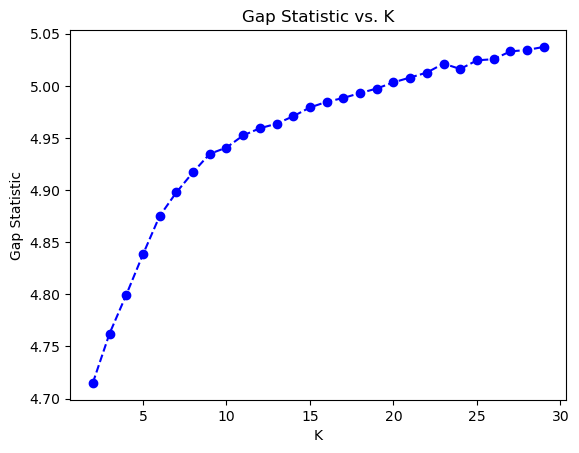

In [4]:
# Gap Statistic for K meansdef optimalK(data, nrefs=3, maxClusters=15):
def optimalK(data, nrefs=3, maxClusters=15):
    """
    Calculates KMeans optimal K using Gap Statistic 
    Params:
        data: ndarry of shape (n_samples, n_features)
        nrefs: number of sample reference datasets to create
        maxClusters: Maximum number of clusters to test for
    Returns: (gaps, optimalK)
    """
    gaps = np.zeros((len(range(1, maxClusters)),))
    resultsdf = pd.DataFrame({'clusterCount':[], 'gap':[]})
    for gap_index, k in enumerate(range(2, maxClusters)):
        
        # Holder for reference dispersion results
        refDisps = np.zeros(nrefs)
        
        # For n references, generate random sample and perform kmeans getting resulting dispersion of each loop
        for i in range(nrefs):
            
            # Create new random reference set
            randomReference = np.random.random_sample(size=data.shape)
            
            # Fit to it
            km = cluster.KMeans(k)
            km.fit(randomReference)
            
            refDisp = km.inertia_
            refDisps[i] = refDisp
            # Fit cluster to original data and create dispersion
        km = cluster.KMeans(k)
        km.fit(data)
        
        origDisp = km.inertia_# Calculate gap statistic
        gap = np.log(np.mean(refDisps)) - np.log(origDisp)# Assign this loop's gap statistic to gaps
        gaps[gap_index] = gap
        
        resultsdf = resultsdf.append({'clusterCount':k, 'gap':gap}, ignore_index=True)
    return (gaps.argmax() + 1, resultsdf)

score_g, df = optimalK(xtrain_tfidf_ngram, nrefs=5, maxClusters=30)
import matplotlib.pyplot as plt
plt.plot(df['clusterCount'], df['gap'], linestyle='--', marker='o', color='b')
plt.xlabel('K')
plt.ylabel('Gap Statistic')
plt.title('Gap Statistic vs. K')

Text(0.5, 1.0, 'Gap Statistic vs. K')

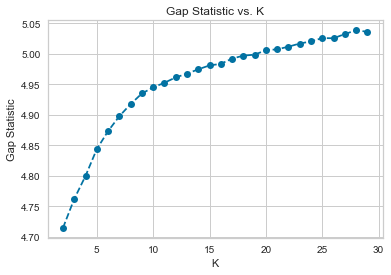

In [63]:

plt.plot(df['clusterCount'], df['gap'], linestyle='--', marker='o', color='b')
plt.xlabel('K')
plt.ylabel('Gap Statistic')
plt.title('Gap Statistic vs. K')

d:\Anaconda\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
d:\Anaconda\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
d:\Anaconda\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
d:\Anaconda\lib\site-packages\sklearn\utils\validation.py:593: FutureWarn

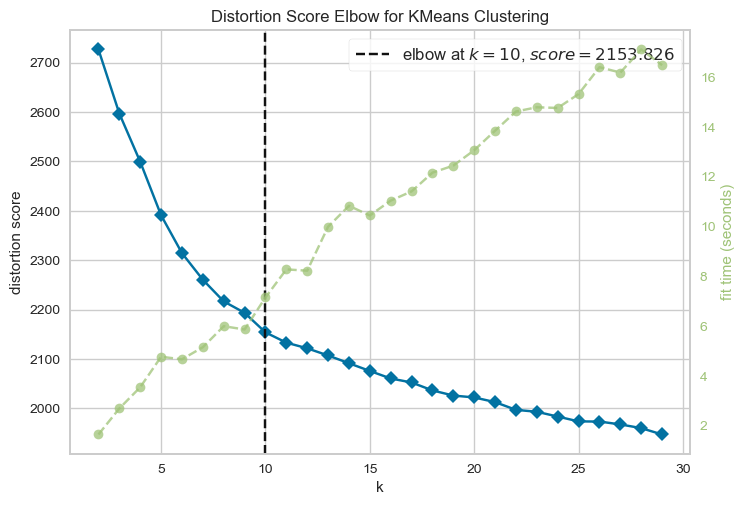

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [5]:
# Elbow Method for K means# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = cluster.KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,30), timings= True)
visualizer.fit(xtrain_tfidf_ngram)        # Fit data to visualizer
visualizer.show()        # Finalize and render figure

## Topic Modeling

In [36]:
import re
import os
import pandas as pd

from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import decomposition, ensemble

import pandas as pd
import numpy as np
import xgboost, textblob, string
from keras.preprocessing import text, sequence
from keras import layers, models, optimizers

# ini_path = 'E:/insper'
# files = 'datajud.csv'
# df = pd.read_csv(os.path.join(ini_path,files))
# interesse = set(list(df[df.ano_cnj>=2020].reset_index(drop = True).numero))

ini_path = 'D:/insper'
files = 'sentencas_todas_processadas_2.csv'
df = pd.read_csv(os.path.join(ini_path,files))
df['ano'] = df.numero_processo.str[11:15].astype(float)
df = df[df['Acórdão']=='Sim']
df.head()

C:\Users\henri\AppData\Local\Temp\ipykernel_12164\2063645336.py:22: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(ini_path,files))


,numero_processo,publicacao,numeros_paginas,nomes_pastas,estado,tipos_processuais,comarcas,representantes,assuntos,tribunal,...,mes,ano,nome_documento,data_decisao,orgao_julgador,tipo_publicacao,concedido,negado,Acórdão,decisao_clean
18,0644136-52.2017.8.04.0001,ADV: MARCELO AUGUSTO JANSEN SODRÉ (OAB 11282/ ...,314,02-08-2018,AM,ação civil de improbidade administrativa,Manaus,['11282/ AM'],dano ao erário,NaN,...,NaN,2017.0,NaN,NaN,NaN,NaN,RECURSO CONHECIDO E IMPRÓVIDO .,NaN,Sim,august jansen sodr improb administr dan erari ...
30,0215732-22.2018.8.04.0001,"ADV: SHELBY MOREIRA FINICELLI (OAB 5684/AM), A...",209,03-08-2018,AM,restituição de coisas apreendidas,Manaus,"['5684/AM', '8457/ AM']",coisas,NaN,...,NaN,2018.0,NaN,NaN,NaN,NaN,"Ante o exposto, em dissonância com o parecer M...",NaN,Sim,shelby mor finicell claud batist carvalh queir...
38,0630524-47.2017.8.04.0001,01 Processo: 0630524-47.2017.8.04.0001 - Apela...,18,04-04-2018,AM,apelação,Manaus,['8245/AM'],NaN,NaN,...,NaN,2017.0,NaN,NaN,NaN,NaN,NaN,"DECISÃO: ""Vistos, relatados e discutidos estes...",Sim,apelaca apel tailson albuquerqu hermerson rodr...
46,0623661-75.2017.8.04.0001,"ADV: ARNOLDO BENTES COIMBRA (OAB 345/AM), ADV:...",104,04-10-2018,AM,embargos de declaração,Manaus,"['345/AM', '6733/AM']",licitações,NaN,...,NaN,2017.0,NaN,NaN,NaN,NaN,NaN,"ADV: ARNOLDO BENTES COIMBRA (OAB 345/AM), ADV:...",Sim,arnold bent coimbr daniel andrad mand seguranc...
53,0035708-44.2010.8.04.0012,"ADV: EDNILSON PIMENTEL MATOS (OAB 1799/AM), RO...",109,05-03-2018,AM,ação civil de improbidade administrativa,NaN,"['1799/AM', '4314/AM', '3665/AM', '4714/AM']",improbidade administrativa,NaN,...,NaN,2010.0,NaN,NaN,NaN,NaN,(STJ - EDcl no REsp: 1635464 MS 2015/0277170-4...,NaN,Sim,ednilson pimentel mat roberv mend josaf mor ka...


In [37]:
import nltk
import os
import os.path
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
# stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim_models  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out


# Convert to list
data = df.decisao_clean.values.tolist()

# Remove Emails
data = [re.sub('\S*@\S*\s?', '', sent) for sent in data]

# Remove new line characters
data = [re.sub('\s+', ' ', sent) for sent in data]

# Remove distracting single quotes
data = [re.sub("\'", "", sent) for sent in data]
#     pprint(data[:1])

data_words = list(sent_to_words(data))
#     print(data_words[:1])

# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
#     print(trigram_mod[bigram_mod[data_words[0]]])

# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
nlp.max_length = 1500000

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])
#     print(data_lemmatized[:1])

# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
#     print(corpus[:1])

lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                        id2word=id2word,
                                        num_topics=15, 
                                        random_state=100,
                                        update_every=1,
                                        chunksize=100,
                                        passes=10,
                                        alpha='auto',
                                        per_word_topics=True)

print(lda_model.print_topics())
doc_lda = lda_model[corpus]

# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Coherence Score: ', coherence_lda)

d:\Anaconda\lib\site-packages\past\builtins\misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
d:\Anaconda\lib\site-packages\spacy\language.py:1895: UserWarning: [W123] Argument disable with value ['parser', 'ner'] is used instead of ['senter'] as specified in the config. Be aware that this might affect other components in your pipeline.
  warnings.warn(


[(0, '0.058*"peculat" + 0.048*"in" + 0.043*"cienc" + 0.041*"prescric" + 0.039*"cadastr" + 0.031*"pend" + 0.027*"barb" + 0.024*"posteri" + 0.023*"alenc" + 0.023*"colacion"'), (1, '0.217*"apel" + 0.181*"apelaca" + 0.130*"habe_corpu" + 0.078*"revi" + 0.055*"defen" + 0.032*"complex" + 0.029*"man" + 0.027*"paci" + 0.026*"text" + 0.018*"outr"'), (2, '0.078*"intimaca" + 0.043*"intime" + 0.042*"intimem" + 0.039*"setembr" + 0.029*"intim" + 0.024*"design" + 0.024*"ser" + 0.023*"apresent" + 0.020*"expe" + 0.020*"preven"'), (3, '0.231*"dant" + 0.175*"teix" + 0.114*"deposit" + 0.087*"vend" + 0.057*"silvi" + 0.054*"coelh" + 0.033*"pagin" + 0.027*"transport" + 0.018*"ader" + 0.015*"claud"'), (4, '0.084*"requisit" + 0.082*"med" + 0.066*"pre" + 0.065*"defer" + 0.059*"final" + 0.053*"conce" + 0.048*"cautel" + 0.045*"rend" + 0.044*"imovel" + 0.041*"limin"'), (5, '0.027*"process" + 0.020*"refer" + 0.017*"publ" + 0.014*"apresent" + 0.014*"remess" + 0.014*"prefeit" + 0.014*"demand" + 0.013*"prelimin" + 0.01